In [1]:
import numpy as np
import cv2
import queue, threading, time
from configparser import ConfigParser
from numpy.core.numeric import zeros_like
import matplotlib.pyplot as plt
import colorsys
import math
import random
from vidgear.gears import VideoGear
from vidgear.gears import WriteGear
import datetime
import os
import csv
import json
from mpl_toolkits.mplot3d import Axes3D
# 导出mag ang数据

    
# 读取mag or ang数据
def read_mag_ang(txtPath):
    return np.loadtxt(txtPath)

mag = read_mag_ang('./save_20230413_095857_frame_109_size_800_600/mag.txt')
mag_copy = read_mag_ang('./save_20230413_095857_frame_109_size_800_600/mag_copy.txt')
ang = read_mag_ang('./save_20230413_095857_frame_109_size_800_600/ang.txt')
print(mag.shape)

# 对结果矩阵偏移的修正
horMat = np.multiply(mag_copy, np.cos(ang))
verMat = np.multiply(mag_copy, np.sin(ang))

(600, 800)


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 30 17:16:28 2022

@author: CFD_Tyro
# https://blog.csdn.net/CFD_Tyro/article/details/123892259
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


'''global parameters'''
# space
N=51
left=-1
right=1
L=right-left
h=L/(N-1)
dx_array=np.linspace(left,right,N)
dy_array=np.linspace(left,right,N)
print(dx_array)
# iterative method: Jacobi, Gauss-Seidel, SOR, SIP, MSD, CG
iter_method="CG"
err=1e-4

'''functions'''
def set_init_boundary():
    f_p0=np.zeros((N,N))
    for i in range(N):
        f_p0[0,i]=np.cos(-1-dy_array[i])*np.exp(-1-dy_array[i]) # left border
        f_p0[N-1,i]=np.cos(1-dy_array[i])*np.exp(1-dy_array[i]) # right border
        f_p0[i,0]=np.cos(dx_array[i]+1)*np.exp(dx_array[i]+1) # bottom
        f_p0[i,N-1]=np.cos(dx_array[i]-1)*np.exp(dx_array[i]-1) # top
    #print(f_p0)
    return f_p0

def set_source():
    S_p=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            S_p[i,j]=-4*np.sin(dx_array[i]-dy_array[j])*np.exp(dx_array[i]-dy_array[j])
    #print(S_p)
    return S_p

def update_SOR(f_p0,S_p,beta):
    Niter=0
    while 1:
        f_p=np.copy(f_p0)
        for i in range(1,N-1):
            for j in range(1,N-1):
                f_p[i,j]=beta/4*(f_p[i-1,j]+f_p[i,j-1]+f_p0[i+1,j]+f_p0[i,j+1]-h*h*S_p[i,j])+(1-beta)*f_p0[i,j]
        Niter=Niter+1
        # compare f_p and f_p0
        resi=0
        for i in range(1,N-1):
            for j in range(1,N-1):
                resi=resi+np.abs(f_p[i,j]-f_p0[i,j])/np.abs(f_p[i,j]+1e-8)
        resi=resi/(N-1)/(N-1)
        f_p0=f_p
        #print("Niter =",Niter,"resi =",resi)
        if resi<err:
            break
    # plot heatmap
    plt.figure()
    sns.heatmap(f_p,cmap="RdBu_r").invert_yaxis()
    plt.show()
    return Niter, f_p

[-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ]


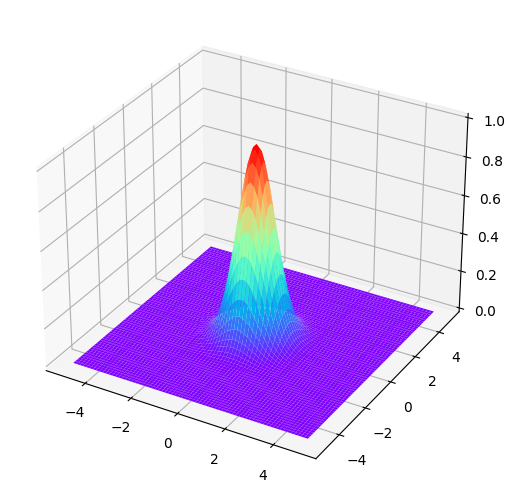

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
figure = plt.figure()
ax = Axes3D(figure)
figure.add_axes(ax)
sigma2 = 0.5
N=71
left=-5
bottem = left   
right=5
up = right
L=right-left
h=L/(N-1)
x=np.linspace(left,right,N)
y=np.linspace(left,right,N)
dx_array = x
dy_array = y
# X = np.arange(-10,10,0.1)
# Y = np.arange(-10,10,0.1)
X,Y = np.meshgrid(x,y)

Z = np.exp(-1*(Y*Y+X*X)/2/sigma2)

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='rainbow')
plt.show()

'''global parameters'''
# space

# print(dx_array)
# iterative method: Jacobi, Gauss-Seidel, SOR, SIP, MSD, CG
iter_method="CG"
err=1e-4





In [4]:
# Z = np.exp(-1*(Y*Y+X*X))*4*(Y*Y+X*X-1)
# np.exp(-1*(Y*Y+X*X)/2/sigma2)


# Dirichlet-type BCs
def set_init_boundary():
    f_p0 = np.zeros((N, N))
    for i in range(N):
        f_p0[0, i] = np.exp(-1 * (y[i] ** 2 + left ** 2))  # left border
        f_p0[N - 1, i] = np.exp(-1 * (y[i] ** 2 + right ** 2))  # right border
        f_p0[i, 0] = np.exp(-1 * (x[i] ** 2 + bottem ** 2))  # bottom
        f_p0[i, N - 1] = np.exp(-1 * (x[i] ** 2 + up ** 2))  # top
    #print(f_p0)
    return f_p0


def set_source():
    S_p = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            S_p[i, j] = np.exp(-1*(y[j]**2+x[i]**2))*4*(y[j]**2+x[i]**2-1)
    #print(S_p)
    return S_p
def matrix_product(A,f_p0):
    Q=np.zeros(f_p0.shape)
    for i in range(Q.shape[0]):
        for j in range(Q.shape[0]):
            Q[i]=Q[i]+A[i,j]*f_p0[j]
    return Q
def update_SOR(f_p0,S_p,beta):
    Niter=0
    while 1:
        f_p=np.copy(f_p0)
        for i in range(1,N-1):
            for j in range(1,N-1):
                f_p[i,j]=beta/4*(f_p[i-1,j]+f_p[i,j-1]+f_p0[i+1,j]+f_p0[i,j+1]-h*h*S_p[i,j])+(1-beta)*f_p0[i,j]
        Niter=Niter+1
        # compare f_p and f_p0
        resi=0
        for i in range(1,N-1):
            for j in range(1,N-1):
                resi=resi+np.abs(f_p[i,j]-f_p0[i,j])/np.abs(f_p[i,j]+1e-8)
        resi=resi/(N-1)/(N-1)
        f_p0=f_p
        #print("Niter =",Niter,"resi =",resi)
        if resi<err:
            break
    # plot heatmap
    plt.figure()
    sns.heatmap(f_p0,cmap="RdBu_r").invert_yaxis()
    plt.show()
    return Niter, f_p0
def update_Jacobi(f_p0,S_p):
    Niter=0
    while 1:
        f_p=np.copy(f_p0)
        for i in range(1,N-1):
            for j in range(1,N-1):
                f_p[i,j]=0.25*(f_p0[i-1,j]+f_p0[i,j-1]+f_p0[i+1,j]+f_p0[i,j+1]-h*h*S_p[i,j])
        Niter=Niter+1
        # compare f_p and f_p0
        resi=0
        for i in range(1,N-1):
            for j in range(1,N-1):
                resi=resi+np.abs(f_p[i,j]-f_p0[i,j])/np.abs(f_p[i,j]+1e-8)
        resi=resi/(N-1)/(N-1)
        f_p0=f_p
        #print("Niter =",Niter,"resi =",resi)
        if resi<err:
            break
    # plot heatmap
    plt.figure()
    sns.heatmap(f_p,cmap="RdBu_r").invert_yaxis()
    plt.show()
    return Niter, f_p

def update_GS(f_p0,S_p):
    Niter=0
    while 1:
        f_p=np.copy(f_p0)
        for i in range(1,N-1):
            for j in range(1,N-1):
                f_p[i,j]=0.25*(f_p[i-1,j]+f_p[i,j-1]+f_p0[i+1,j]+f_p0[i,j+1]-h*h*S_p[i,j])
        Niter=Niter+1
        # compare f_p and f_p0
        resi=0
        for i in range(1,N-1):
            for j in range(1,N-1):
                resi=resi+np.abs(f_p[i,j]-f_p0[i,j])/np.abs(f_p[i,j]+1e-8)
        resi=resi/(N-1)/(N-1)
        f_p0=f_p
        #print("Niter =",Niter,"resi =",resi)
        if resi<err:
            break
    # plot heatmap
    plt.figure()
    sns.heatmap(f_p,cmap="RdBu_r").invert_yaxis()
    plt.show()
    return Niter, f_p

# 需要修改里面的值
def update_cg():
    # 1. set boundary
    top_border=np.cos(dx_array-1)*np.exp(dx_array-1)
    bottom_border=np.cos(dx_array+1)*np.exp(dx_array+1)
    left_border=np.cos(-1-dy_array)*np.exp(-1-dy_array)
    right_border=np.cos(1-dy_array)*np.exp(1-dy_array)
    # 2. construct coefficient matrix A: AX=Q
    # 4x_p = x_w + x_e + x_n + x_s - h*h*f_p
    # 4x_{i} = x_{i-1} + x_{i+1} + x_{i+N} + x_{i-N} - h*h*f_{i}
    A=np.zeros((N*N,N*N))
    Q=np.zeros(N*N)
    for k in range(N*N):
        # boundary first, internal second
        if k<N: # bottom border
            A[k,k]=1
            i=k%N
            Q[k]=bottom_border[i]
        elif k>=N*N-N: # top border
            A[k,k]=1
            i=k%N
            Q[k]=top_border[i]
        elif k%N==0: # left border
            A[k,k]=1
            j=int(k/N)
            Q[k]=left_border[j]
        elif (k+1)%N==0: # right border
            A[k,k]=1
            j=int(k/N)
            Q[k]=right_border[j]
        else: # internal
            A[k,k]=4 # P
            A[k,k-N]=-1 # S
            A[k,k+N]=-1 # N
            A[k,k-1]=-1 # W
            A[k,k+1]=-1 # E
            i=k%N
            j=int(k/N)
            Q[k]=-h*h*(np.exp(-1*(y[j]**2+x[i]**2))*4*(y[j]**2+x[i]**2-1))
    # 3. compute R^n iteratively
    X=Q # set initial values
    D=np.zeros(Q.shape)
    # compute initial residual
    prod=matrix_product(A,X)
    R0=Q-prod
    D=R0
    Niter=0
    while 1:
        # compute alpha using R0 and D
        numerator=sum(R0*R0)
        denominator=sum(D*matrix_product(A, D))
        alpha=numerator/denominator
        X=X+alpha*D
        # compute new residual
        R1=Q-matrix_product(A,X)
        resi2=np.sqrt(sum(R1*R1))
        print("Niter=",Niter,"resi2=",resi2)
        if resi2<err:
            break
        # compute beta
        beta=sum(R1*R1)/sum(R0*R0)
        # update D
        D=R1+beta*D
        # update R0
        R0=R1
        Niter+=1
    # 4. output result, turn 1d array to 2d
    solu=np.zeros((N,N))
    for k in range(N*N):
        i=k%N
        j=int(k/N)
        solu[i,j]=X[k]
    plt.figure()
    sns.heatmap(solu,cmap="RdBu_r").invert_yaxis()
    plt.show()
    return Niter, solu

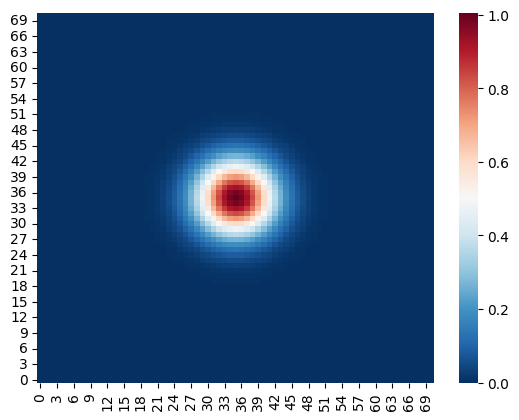

SOR iteration number 306  N = 71  residual = 0.0001  beta = 1.9
total time 5.497680187225342s 


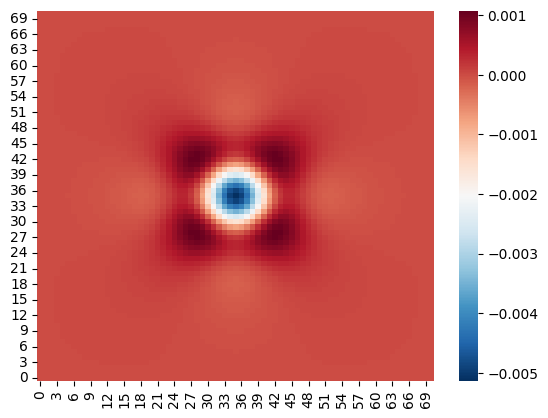

In [5]:
"""main function"""
import time
if __name__ == '__main__':
    f_p0=set_init_boundary()
    S_p=set_source()
    iter_method = 'SOR'
    start_time =time.time()
    if iter_method == "Jacobi":
        Niter, f_p =update_Jacobi(f_p0,S_p)
        print("Jacobi iteration number",Niter," N =",N," residual =",err)
    elif iter_method == "GS":
        Niter, f_p=update_GS(f_p0,S_p)
        print("Gauss-Seidel iteration number",Niter," N =",N," residual =",err)
    elif iter_method == "SOR":
        sor_beta=1.9
        Niter, f_p=update_SOR(f_p0,S_p,sor_beta)
        print("SOR iteration number",Niter," N =",N," residual =",err," beta =",sor_beta)
    elif iter_method == "CG":
        Niter, f_p=update_cg()
        print("CG iteration number",Niter," N =",N," residual =",err)
    else:
        print("Choose right iterative method")
        exit(-1)
    end_time = time.time()
    # analytical solution
    solu=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            solu[i,j]=np.exp(-1*(x[i]**2+y[j]**2))
    # plt.figure()
    # sns.heatmap(solu,cmap="RdBu_r").invert_yaxis()
    # plt.show()
    print("total time {}s ".format(end_time - start_time))
    plt.figure()
    sns.heatmap(solu-f_p,cmap="RdBu_r").invert_yaxis()
    plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def Gaussian_Distribution(N=2, M=1000, m=0, sigma=1):
    '''
    Parameters
    ----------
    N 维度
    M 样本数
    m 样本均值
    sigma: 样本方差
    
    Returns
    -------
    data  shape(M, N), M 个 N 维服从高斯分布的样本
    Gaussian  高斯分布概率密度函数
    '''
    mean = np.zeros(N) + m  # 均值矩阵，每个维度的均值都为 m
    cov = np.eye(N) * sigma  # 协方差矩阵，每个维度的方差都为 sigma

    # 产生 N 维高斯分布数据
    data = np.random.multivariate_normal(mean, cov, M)
    # N 维数据高斯分布概率密度函数
    Gaussian = multivariate_normal(mean=mean, cov=cov)
    
    return data, Gaussian

M = 1000
data, Gaussian = Gaussian_Distribution(N=2, M=M, sigma=0.1)
# 生成二维网格平面
X, Y = np.meshgrid(np.linspace(-1,1,M), np.linspace(-1,1,M))
# 二维坐标数据
d = np.dstack([X,Y])
# 计算二维联合高斯概率
Z = Gaussian.pdf(d).reshape(M,M)


'''二元高斯概率分布图'''

figure = plt.figure()
ax = Axes3D(figure)
figure.add_axes(ax)


ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


KeyboardInterrupt: 